# Neighborhood-based Collaborative Filtering

### User-Based CF - 사용자의 유사도를 구해서, 아이템 추천
### Item-Based CF - 아이템의 유사도를 구해서, 사용자 선호 아이템과 유사한 아이템 추천

#### 사용자가 시청하지 않은 항목 중 상위 N개의 선호할 항목 추천

#### 1. 유사도 구하기(추천하려는 대상(사용자)와 다른 사용자 들 간의 유사도)
#### 2. 각 item에 대한 선호도 예측

# Matrix Factorization(MF)
### user-item matrix (R)은 두 latent 행렬 U와 V의 선형 결합으로 근사할 수 있음(Gradient Descent Method로 학습)
### R = U * V^T

### R : user-item matrix(m*n)
### U : latent user matrix(m*k)
### V : latent item matrix(n * k)
#### k : latent feature의 개수


#### 단계 1 : U, V 를 임의의 값으로 초기화
#### 단계 2 : MF를 이용한 예측 ( U와 V를 이용하여 R 예측)
#### 단계 3 : U,V 행렬 갱신 -> cost function 이용하여 [예측 값과 정답의 차이를 구함]
#### 단계 4 : U,V 행렬 갱신 -> gradient descent 방법을 이용하여 U와 V 업데이트 (전체 차이를 줄이도록 U,V 업데이트)

#### 단계 2~4를 반복하여 U,V 행렬 갱신

#### 추천 : 예측된 값을 이용하여 item 추천
#### ** 하이퍼파라미터 설정 (latent feature 개수, learning rate, traing_epochs(학습횟수) 설정 )(학습에 필요한 latent 행렬 형태, 학습 비율, 학습 횟수 설정 필요)

# Autoencoder-based Collaborative Filtering


## Autoencoder(AE) : 입력을 인코딩(압축)하였다가 다시 복원

#### AE를 이용하여 복원된 사용자의 시청 정보를 이용하여, 사용자가 시청하지 않은 항목 중 하나를 추천

#### 단계 1 : 파라미터 초기화 (𝑾,𝒃와𝑾′,𝒃′를임의의값으로초기화함)
#### 단계 2 : AE를 이용한 item에 대한 선호도 예측

#### 단계 3 : 예측값과 정답의 차이를 구함
#### 단계4: 전체 차이를 줄이도록 모델 학습 -> AE를 이용한 추천 시 cross-entropy loss를 이용해 오차가 계산됨
#### 추천


#### ** 학습에 필요한 은닉층의 차원, 학습 비율, 학습 횟수 설정 (은닉층의 dimension, learning rate, training epoch(학습 횟수))

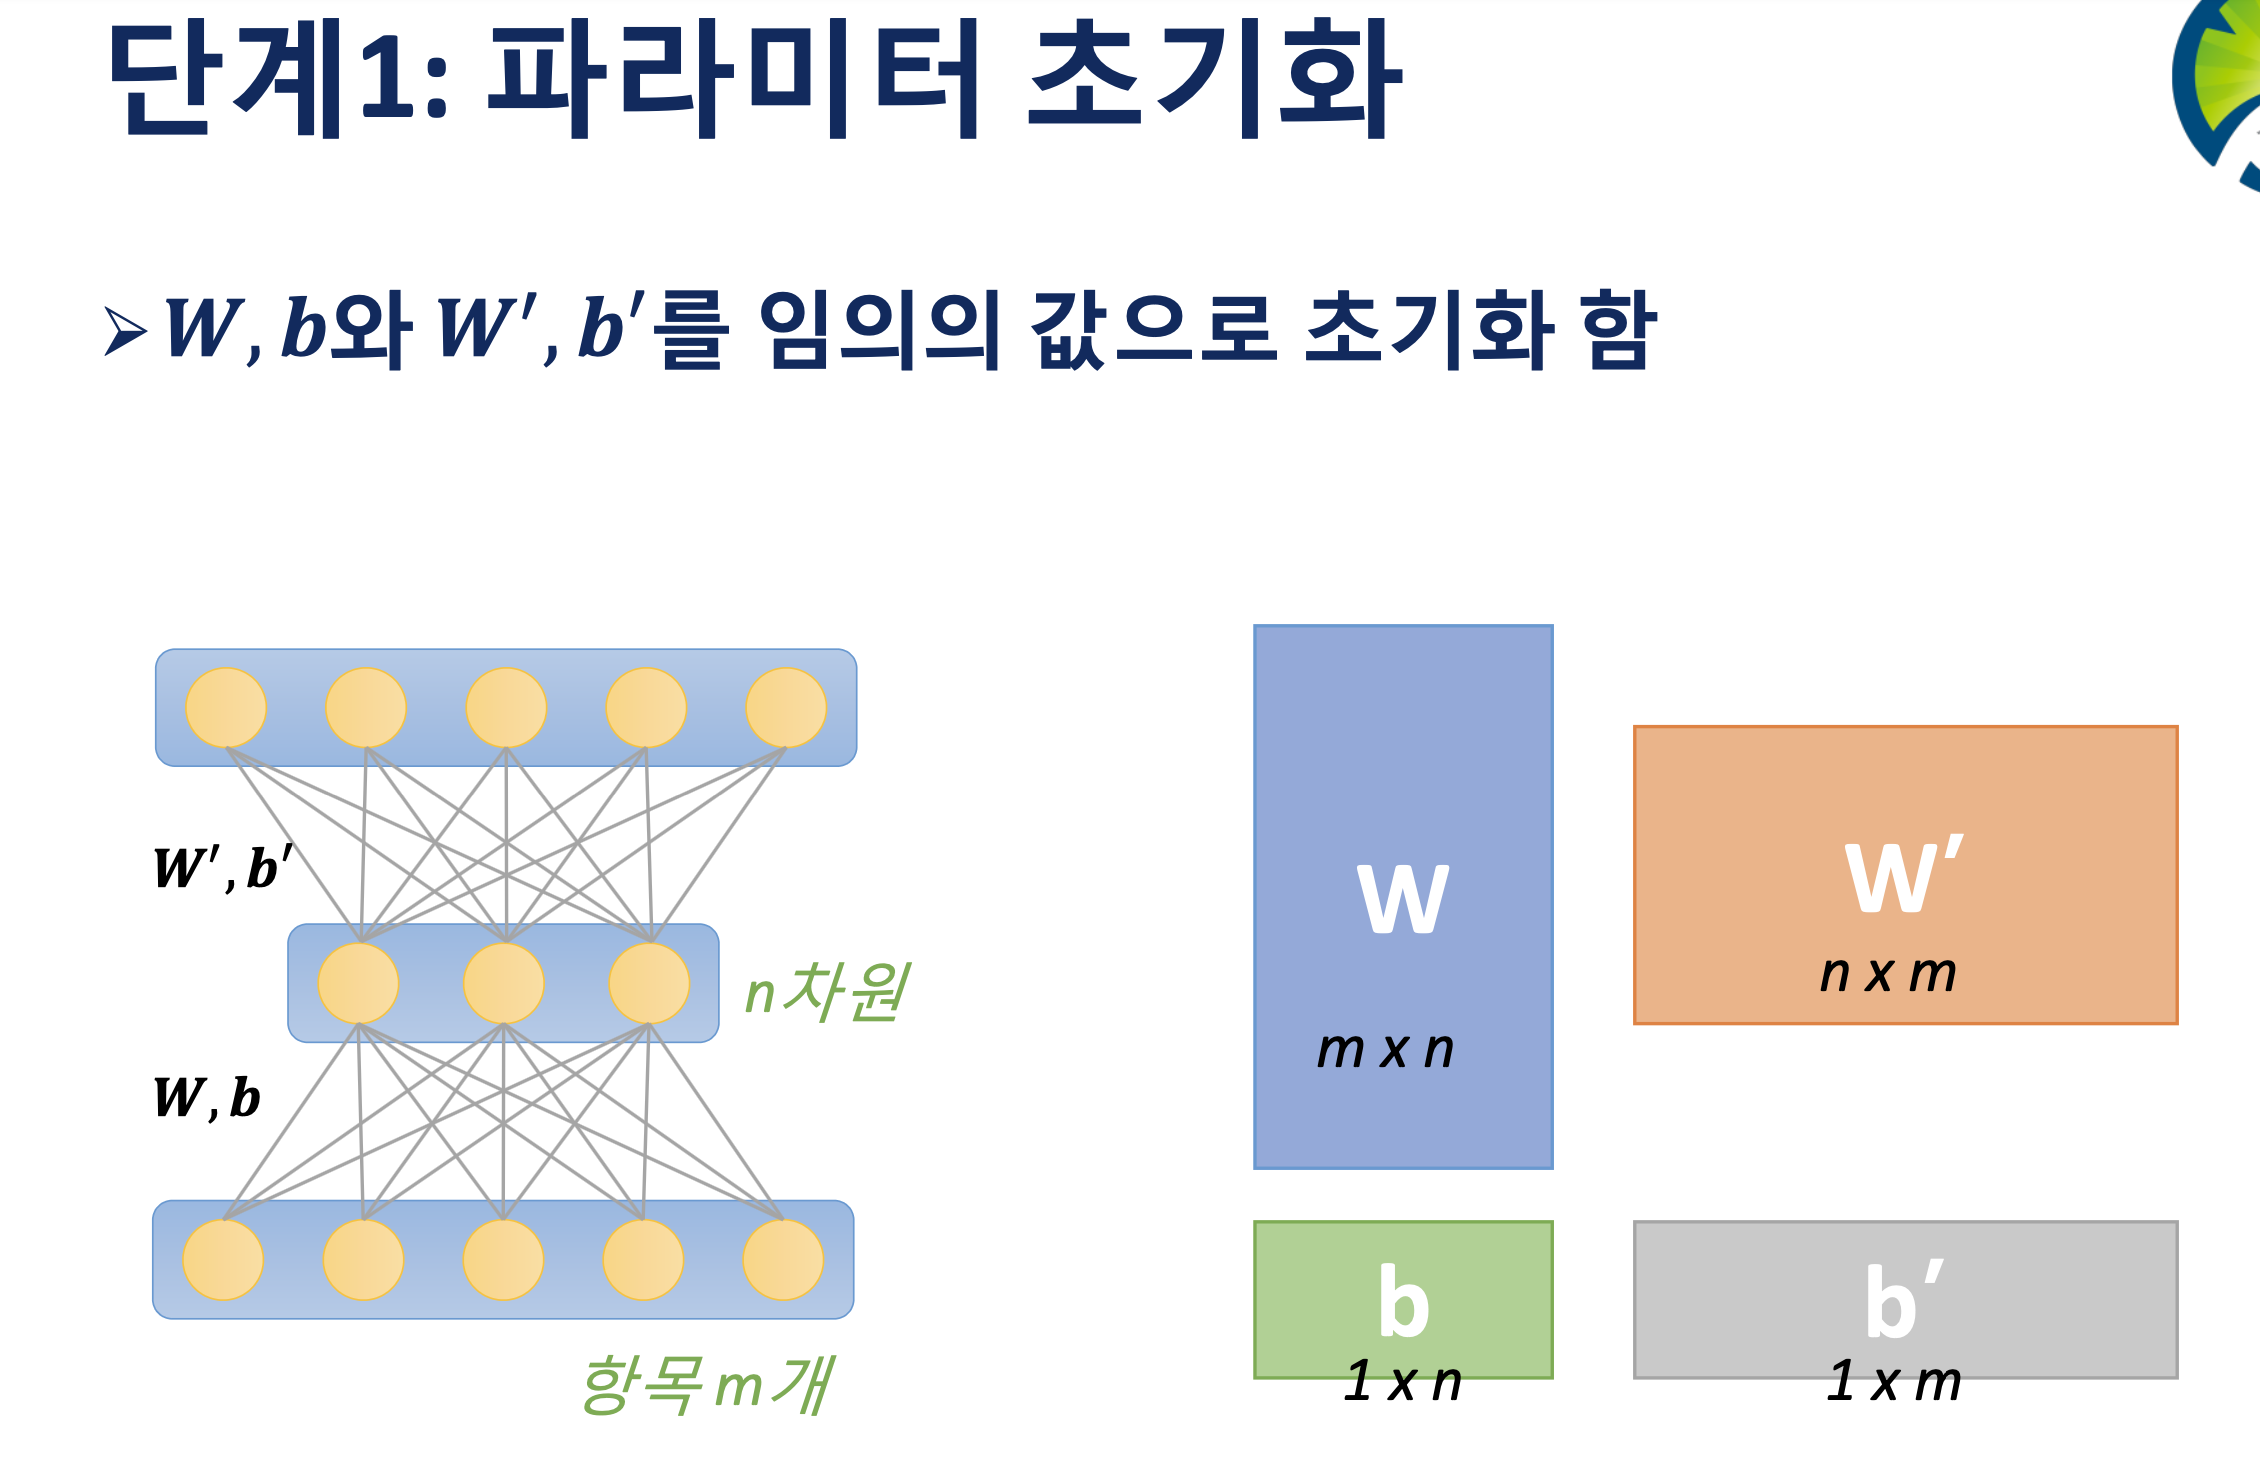

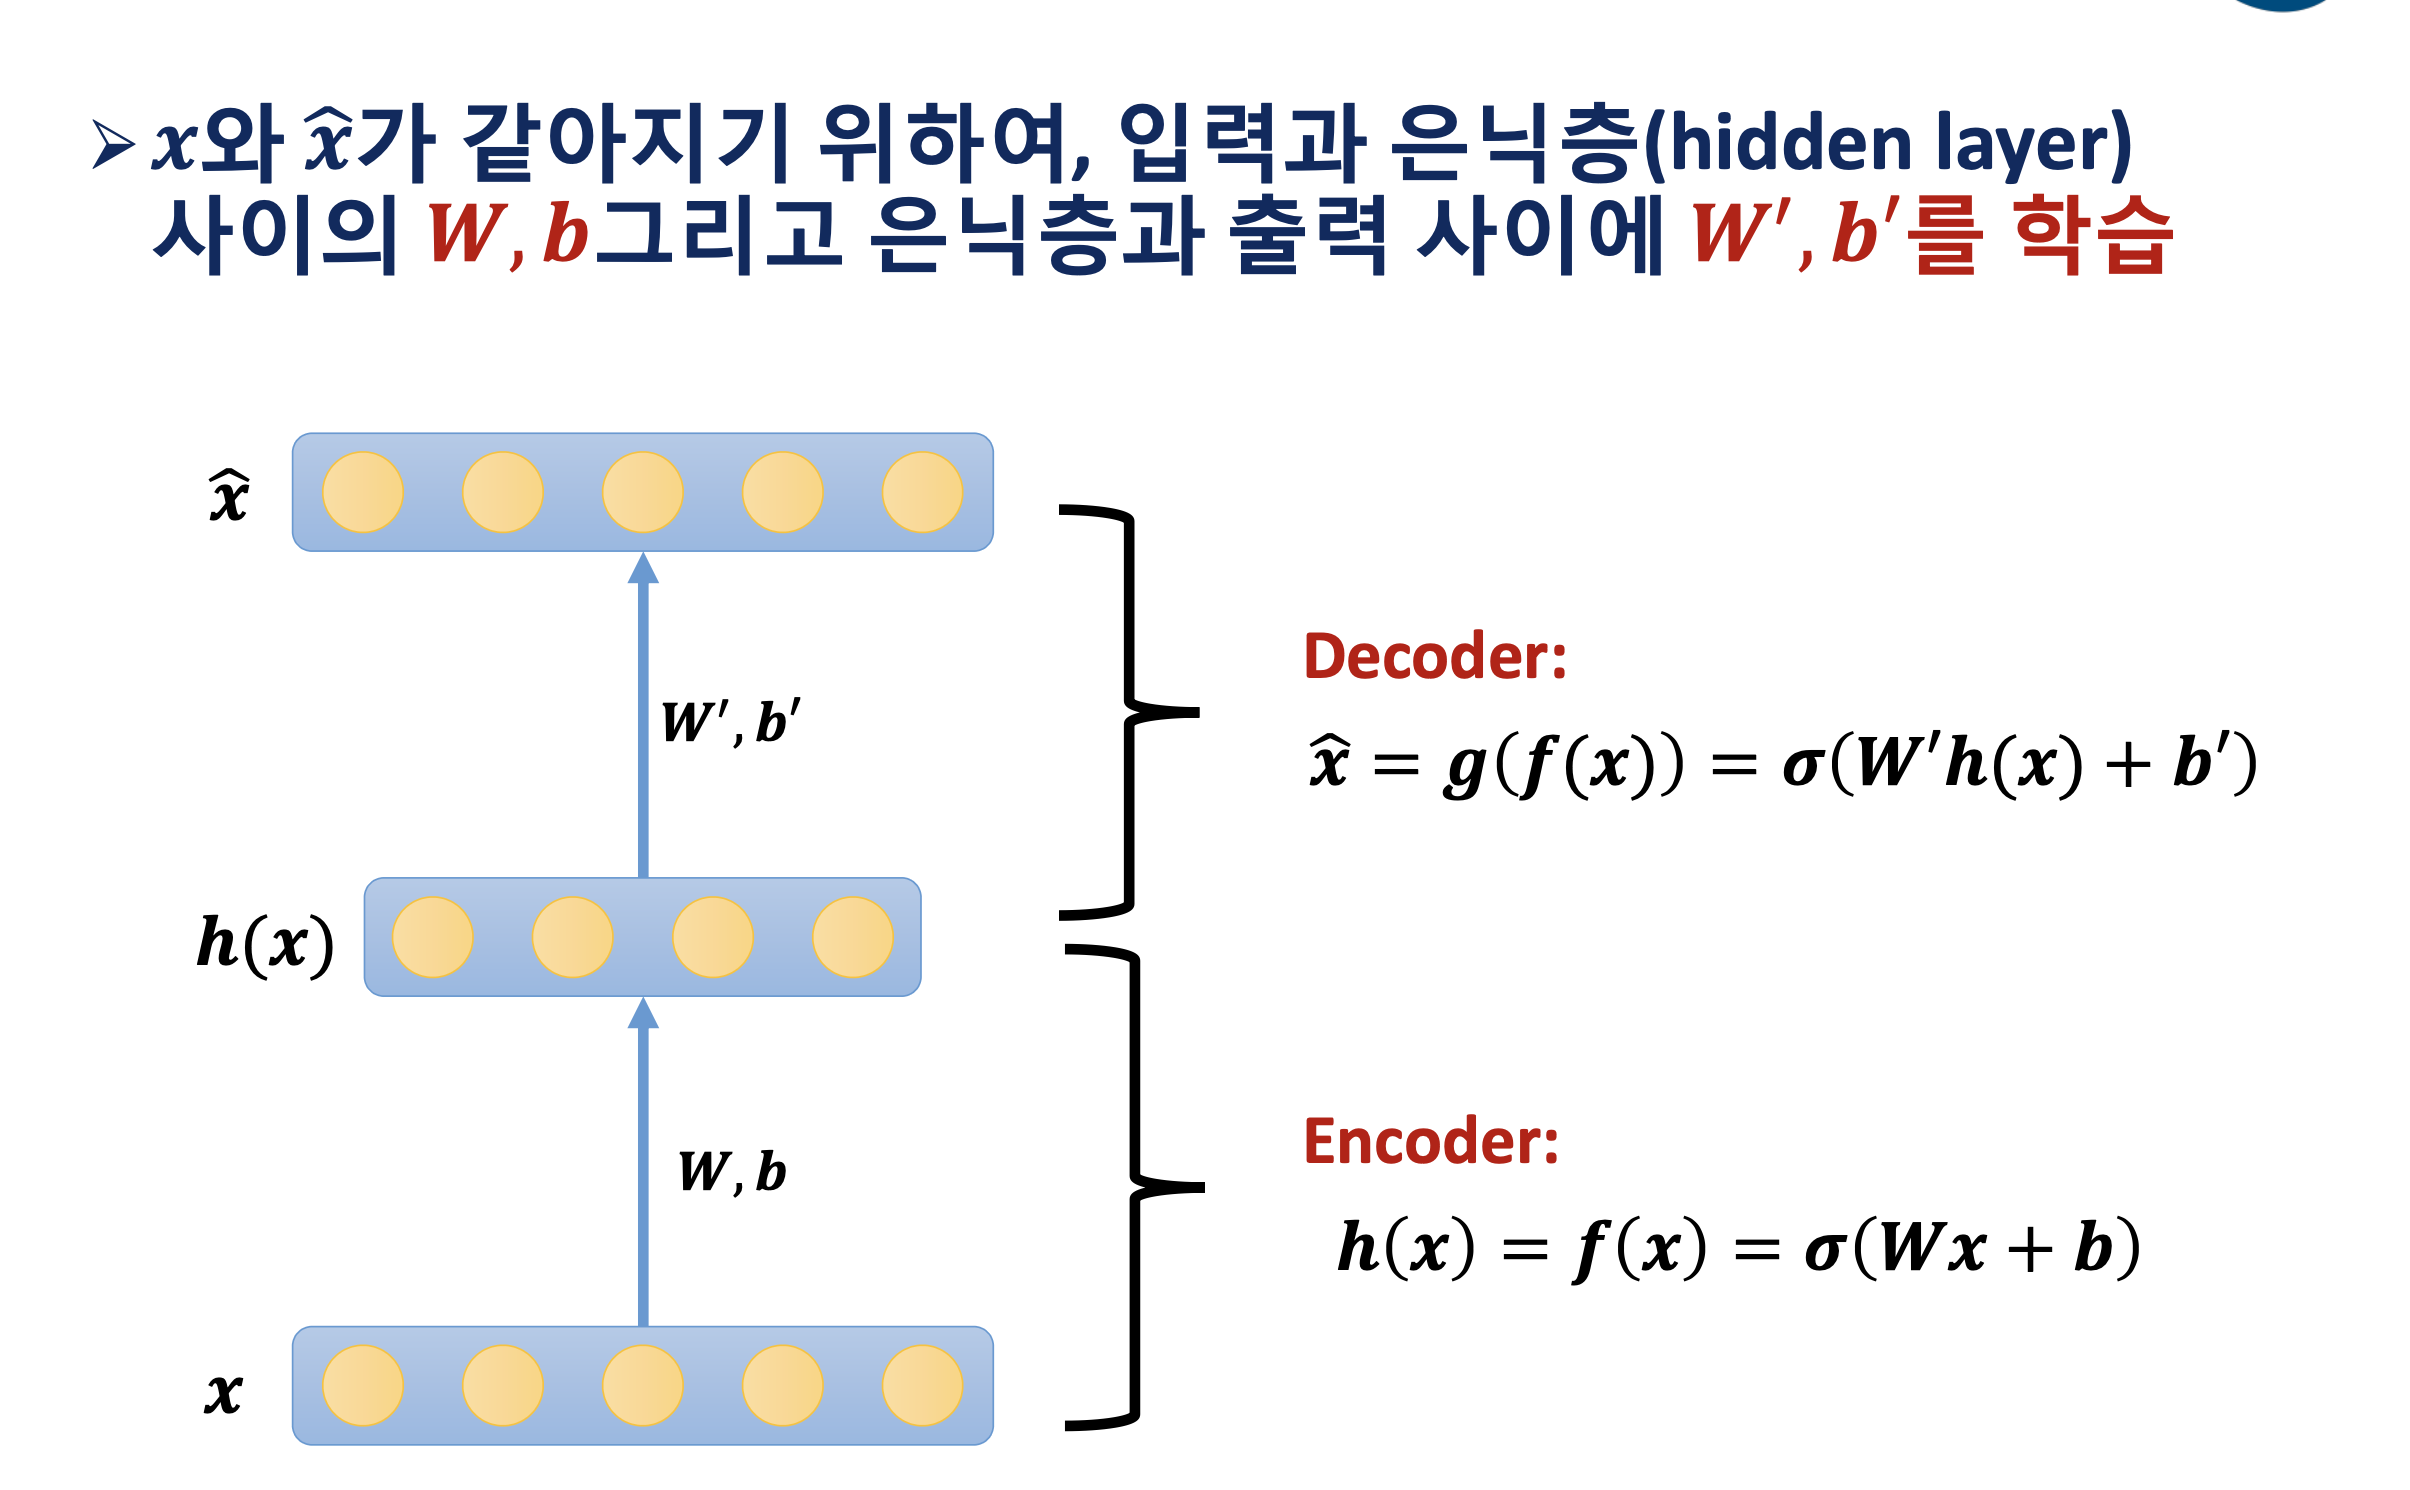

# Surprise 라이브러리를 이용한 추천 시스템 구현

In [1]:
## 내장 데이터를 이용한 추천
from surprise import Dataset
from surprise.model_selection import KFold
from surprise import BaselineOnly ## BaselineOnly : 편향을 이용한 추천 알고리즘
from surprise import accuracy

data = Dataset.load_builtin('ml-100k')
kf = KFold(n_splits=5, random_state=0)
algo = BaselineOnly()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    accuracy.rmse(predictions, verbose=True)

Estimating biases using als...
RMSE: 0.9447
Estimating biases using als...
RMSE: 0.9401
Estimating biases using als...
RMSE: 0.9383
Estimating biases using als...
RMSE: 0.9417
Estimating biases using als...
RMSE: 0.9551


In [6]:
## 외부 데이터를 이용한 추천
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import KFold 
from surprise import BaselineOnly
from surprise import accuracy
import os ## 파일 경로를 지정하기 위한 라이브러리

file_path = os.path.expanduser('~/.surprise_data/ml-100k/ml-100k/u.data') 
reader = Reader(line_format='user item rating timestamp', sep='\t') # 데이터 형식과 분리 기준 지정
data = Dataset.load_from_file(file_path, reader=reader)

kf = KFold(n_splits=5, random_state=0) 
algo = BaselineOnly()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    accuracy.rmse(predictions, verbose=True)

Estimating biases using als...
RMSE: 0.9447
Estimating biases using als...
RMSE: 0.9401
Estimating biases using als...
RMSE: 0.9383
Estimating biases using als...
RMSE: 0.9417
Estimating biases using als...
RMSE: 0.9551


In [8]:
## 학습/ 평가 데이터 나눠서 불러오기

from surprise import Reader
from surprise import Dataset
from surprise import BaselineOnly
from surprise import accuracy
from surprise.model_selection import PredefinedKFold #  Predefined K Fold - 직접 지정한 학습/평가 데이터로 모델 평가
import os


files_dir = os.path.expanduser('~/.surprise_data/ml-100k/ml-100k/')
# [(학습 데이터1 경로, 평가 데이터1 경로), (학습 데이터2 경로, 평가 데이터2 경로) ]
folds_files = [(files_dir+'u1.base',files_dir+'u1.test'),(files_dir+'u2.base',files_dir+'u2.test')] 
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_folds(folds_files, reader=reader) 

pkf = PredefinedKFold()
algo = BaselineOnly()

for trainset, testset in pkf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    accuracy.rmse(predictions, verbose=True)

Estimating biases using als...
RMSE: 0.9599
Estimating biases using als...
RMSE: 0.9477


In [9]:
## 학습/평가 데이터를 비율로 나누기
from surprise import BaselineOnly
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.25) # 비율 지정 - 75%를 학습 데이터 셋으로, 25%를 평가 데이터로 나눔

algo = BaselineOnly()

algo.fit(trainset)
predictions = algo.test(testset) 
accuracy.rmse(predictions)
 

Estimating biases using als...
RMSE: 0.9486


0.9485972981370695

## 예측 알고리즘 성능 비교

In [11]:
#  1. NormalPredictor(Random) 을 이용한 평점 예측

from surprise import NormalPredictor
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.25)

algo = NormalPredictor() # NormalPredictor 알고리즘 객체 생성

algo.fit(trainset) # algo.fit(data): data를 이용하여 알고리즘 학습
predictions = algo.test(testset) 
accuracy.rmse(predictions)
 

RMSE: 1.5146


1.5146297705119984

In [12]:
# 2. BaselineOnly을 이용한 평점 예측 - 전체 평균, 사용자 편향, 아이템 편향을 이용한 평점 예측
from surprise import BaselineOnly
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.25)

algo = BaselineOnly()

algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
 

Estimating biases using als...
RMSE: 0.9460


0.9460204958840825

In [13]:
# 3. KNNBasic을 이용한 평점 예측
from surprise import KNNBasic
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.25)

sim_options = {'name': 'cosine', # 'cosine', 'msd', 'pearson' ## 유사도 알고리즘
               'user_based': False, ## True - 사용자 기반 추천 / False - 아이템 기반 추천
                'shrinkage': 0 } # default 100 ## PCC 계산을 보정해주는 파라미터

algo = KNNBasic(k=40, min_k=1, sim_options=sim_options) # k - 이웃의 수 / min-k : 최소 이웃의 수

algo.fit(trainset)
predictions = algo.test(testset) 
accuracy.rmse(predictions)
 


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0312


1.0312315885362686

In [14]:
# 4. KNNBaseline을 이용한 평점 예측 - 유사도와 편향을 이용한 이웃기반 예측
from surprise import KNNBaseline
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.25)

sim_options = {'name': 'cosine', # 'cosine', 'msd', 'pearson' 
               'user_based': False,
               'shrinkage': 0 } # default 100

algo = KNNBaseline(k=40, min_k=1, sim_options=sim_options)

algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9497


0.9496673775803031

In [15]:
# 5. NMF을 이용한 평점 예측 - 행렬 분해 기반 예측

from surprise import NMF
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.25)

algo = NMF(n_factors=15, n_epochs=50, biased=False, verbose=True ) # n_factors: 잠재 차원 수/n_epochs: 훈련 반복 수/biased: 편향 고려 여부/verbose: n_epochs 출력 여부

algo.fit(trainset)
predictions = algo.test(testset) 
accuracy.rmse(predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
RMSE: 0.97

0.9707867982812936

In [16]:
## 6. SVD을 이용한 평점 예측 - 행렬 분해 기반 예측

from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.25)

algo = SVD(n_factors=15, n_epochs=50, biased=False, init_mean=0.05, lr_all=0.005,verbose=True )
# n_factors: 잠재 차원 수/ n_epochs: 훈련 반복 수 / biased: 편향 고려 여부 / init_mean: 초기 값 설정 파라미터 / lr_all: 학습 비율 / verbose: n_epochs 출력 여부

algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
RMSE: 0.96

0.9632069371181514

In [17]:
# 7. SVD++을 이용한 평점 예측

from surprise import SVDpp
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.25)

algo = SVDpp(n_factors=15, n_epochs=20, init_mean=0.05, lr_all=0.007,verbose=True )
# n_factors: 잠재 차원 수/n_epochs: 훈련 반복 수 / init_mean: 초기 값 설정 파라미터 / lr_all: 학습 비율 / verbose: n_epochs 출력 여부
algo.fit(trainset)
predictions = algo.test(testset) 
accuracy.rmse(predictions)

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
RMSE: 0.9255


0.9254764177115407

## 모델 평가 지표 (RMSE, MAE)

In [18]:
# 모델 평가 지표 (RMSE, MAE)
from surprise import BaselineOnly
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.25)

algo = BaselineOnly()
algo.fit(trainset)

predictions = algo.test(testset) 
accuracy.rmse(predictions, verbose=True)
mae = accuracy.mae(predictions, verbose=False) 
print("MAE:", mae)
 

Estimating biases using als...
RMSE: 0.9449
MAE: 0.7506090274420972


In [19]:
# Cross validation
from surprise import BaselineOnly
from surprise import Dataset
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate

data = Dataset.load_builtin('ml-100k') 
algo = BaselineOnly()

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

kf = KFold(random_state=0)
cross_validate(algo, data, ['rmse', 'mae'], kf, verbose=True)
  

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9434  0.9384  0.9409  0.9544  0.9437  0.9442  0.0055  
MAE (testset)     0.7495  0.7453  0.7470  0.7550  0.7461  0.7486  0.0035  
Fit time          0.05    0.04    0.06    0.05    0.05    0.05    0.00    
Test time         0.03    0.07    0.03    0.03    0.07    0.05    0.02    
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9447  0.9401  0.9383  0.9417  0.9551  0.9440  0.0059  
MAE (testset)     0.7491  0.7459  0.743

{'test_rmse': array([0.94465105, 0.94014029, 0.93832943, 0.94167164, 0.95505431]),
 'test_mae': array([0.74914422, 0.74589425, 0.74370546, 0.74577822, 0.75734258]),
 'fit_time': (0.04572868347167969,
  0.07984304428100586,
  0.06795501708984375,
  0.05566287040710449,
  0.06965494155883789),
 'test_time': (0.039330244064331055,
  0.09730386734008789,
  0.035948991775512695,
  0.07556009292602539,
  0.03646492958068848)}

In [21]:
# 랜덤 Cross validation

data = Dataset.load_builtin('ml-100k') 
algo = BaselineOnly()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
## 결과 해석 : Fit time: 훈련 시간, Test time: 평가 시간

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9443  0.9465  0.9454  0.9375  0.9476  0.9442  0.0035  
MAE (testset)     0.7477  0.7522  0.7475  0.7431  0.7528  0.7486  0.0036  
Fit time          0.04    0.05    0.05    0.04    0.05    0.05    0.00    
Test time         0.03    0.07    0.03    0.07    0.03    0.05    0.02    


{'test_rmse': array([0.94427713, 0.94647004, 0.94535558, 0.93751983, 0.94762275]),
 'test_mae': array([0.74768517, 0.75216032, 0.74751602, 0.74305528, 0.75281185]),
 'fit_time': (0.04230499267578125,
  0.04603171348571777,
  0.05324816703796387,
  0.04486393928527832,
  0.04930877685546875),
 'test_time': (0.03463888168334961,
  0.07269620895385742,
  0.03440380096435547,
  0.07200908660888672,
  0.03431415557861328)}

In [22]:
## K-fold를 이용한 Cross validation
kf = KFold(random_state=0)
cross_validate(algo, data, ['rmse', 'mae'], kf, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9447  0.9401  0.9383  0.9417  0.9551  0.9440  0.0059  
MAE (testset)     0.7491  0.7459  0.7437  0.7458  0.7573  0.7484  0.0048  
Fit time          0.05    0.05    0.05    0.05    0.05    0.05    0.00    
Test time         0.07    0.03    0.03    0.03    0.03    0.04    0.02    


{'test_rmse': array([0.94465105, 0.94014029, 0.93832943, 0.94167164, 0.95505431]),
 'test_mae': array([0.74914422, 0.74589425, 0.74370546, 0.74577822, 0.75734258]),
 'fit_time': (0.04736328125,
  0.046629905700683594,
  0.047534942626953125,
  0.04775500297546387,
  0.04761385917663574),
 'test_time': (0.07497477531433105,
  0.03448081016540527,
  0.03379011154174805,
  0.033776283264160156,
  0.03412795066833496)}

## 파라미터 튜닝

In [26]:

# K-NN을 이용한 파라미터 튜닝
from surprise import KNNBasic
from surprise import Dataset
from surprise.model_selection import GridSearchCV # GridSearchCV: 설정한 파라미터에 대해 전체 조합을 평가 하는 라이브러리
import pandas as pd

data = Dataset.load_builtin('ml-100k') 
# 원하는 파라미터 조합을 설정  (여기서는 2*2*2 = 8가지 경우의 조합)
param_grid = {'k': [5, 10], #k:찾고자하는이웃의수
              'sim_options': {'name': ['msd', 'cosine'],  # sim_options: 유사도 측정 방법- name: 유사도 측정 알고리즘 설정 / user_based: 사용자 기반 / 아이템 기반 설정
                              'user_based': [False, True]} }

gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=2) # GridSearchCV(알고리즘, 평가 할 파라미터, 평가 지표, cv)
gs.fit(data)

print(gs.best_score['rmse'])  # gs.best_score['rmse’]: RMSE에 대한 가장 좋은 결과를 출력
print(gs.best_params['rmse']) # gs.best_params['rmse’]: RMSE에 대한 가장 좋은 결과를 내는 파라미터 출력

## 상세 결과 확인
results_df = pd.DataFrame.from_dict(gs.cv_results) # Pandas 데이터 프레임형식으로 상세 결과 저장 및 출력
print(results_df)
 # 총 8가지 조합에 대하여 시간/ 파라미터/ 파라미터 별 RMSE기반 순위를 보여
 

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matr

In [27]:
# ML 100K 데이터에서 임의의 사용자가 좋아할 영화 추천이 잘 되는지 살 펴보기
# 임의의 사용자에게 NormalPredictor를 이용해서 영화 추천하기
# Top N 추천 영화가 어떤 영화인지 살펴보기

import numpy as np
from surprise import NormalPredictor 
from surprise import Dataset
import os
import pandas as pd
from surprise import Reader

def get_movie_titles(): # 영화 제목 가져오는 함수
    files_dir = os.path.expanduser('~/.surprise_data/ml-100k/ml-100k/')
    m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url'] 
    movies = pd.read_csv(files_dir+'u.item', sep='|', names=m_cols, usecols=range(5),encoding='latin-1') 
    
    return movies['title']

def get_ml_100k(): # ML 100k 평점 데이터 가져오는 함수
    files_dir = os.path.expanduser('~/.surprise_data/ml-100k/ml-100k/') 
    r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp'] 
    ratings = pd.read_csv(files_dir+'u.data', sep='\t', names=r_cols) 
    
    return ratings
 
    
## NormalPredictor을 이용하여 좋아할 아이템 예측
pd_data = get_ml_100k() # ML 100k 평점 데이터 가져옴

# surprise 라이브러리 내부 데이터 형식으로 변경
reader = Reader(rating_scale=(1, 5))
sp_data = Dataset.load_from_df(pd_data[['user_id', 'movie_id', 'rating']], reader)

train_set = sp_data.build_full_trainset() # 전체 데이터를 학습 데이터로 사용 
algo = NormalPredictor() # 추천 알고리즘 설정
algo.fit(train_set) # 알고리즘 학습

test_set = train_set.build_anti_testset() # 학습 데이터를 제외한 나머지를 평가 데이터로 사용
predictions = algo.test(test_set) # 평가 데이터에 대한 평점 예측

## 특정 사용자에 대하여 예측된 Top10 항목 보기

# 평점 예측값으로 이루어진 사용자-항목 행렬 만듦
predicted_user_item_matrix = np.zeros((train_set.n_users, train_set.n_items)) 
for uid, iid, true_r, est, _ in predictions:
    predicted_user_item_matrix[int(uid)-1, int(iid)-1] = est 
    
my_id = 3 # 특정 사용자 지정

# 특정 사용자에 대해 예측 평점이 높은 순서대로 항목 정렬
sorted_items = np.argsort(predicted_user_item_matrix[my_id]) # np.argsort(): 데이터를 정렬한 뒤 인덱스 반환
sorted_items = sorted_items[::-1]
movies = get_movie_titles() # 영화 제목 가져오기
print("추천 영화 Top 10")
print(movies[sorted_items[0:10]])

# 특정 사용자가 실제 평가한 항목 중 Top3 항목 보기

print("-----------------------------------------------------")
ratings = pd_data[pd_data['user_id'] == (my_id+1)] # 특정 사용자의 항목 평점 가져옴

# 평점과 항목을 따로 저장
user_ratings = ratings['rating']
rated_items = ratings['movie_id']

# 평점이 높은 순서대로 항목 정렬
sorted_index = np.argsort(np.asarray(user_ratings))
sorted_index = sorted_index[::-1]
rated_items = np.asarray(rated_items)
sorted_items = rated_items[sorted_index]-1 
print("사용자 평가 Top 10") 
print(movies[sorted_items[0:10]])


추천 영화 Top 10
1221                   Judgment Night (1993)
138                     Love Bug, The (1969)
493                   His Girl Friday (1940)
490     Adventures of Robin Hood, The (1938)
484                      My Fair Lady (1964)
1150                Original Gangstas (1996)
468                        Short Cuts (1993)
124                        Phenomenon (1996)
1525                          Witness (1985)
1185                     Inkwell, The (1994)
Name: title, dtype: object
-----------------------------------------------------
사용자 평가 Top 10
300               In & Out (1997)
257                Contact (1997)
302            Ulee's Gold (1997)
360              Incognito (1997)
293              Liar Liar (1997)
49               Star Wars (1977)
353    Wedding Singer, The (1998)
359             Wonderland (1997)
299          Air Force One (1997)
328     Desperate Measures (1998)
Name: title, dtype: object
